Données chargées avec succès.
Marques rares supprimées.
   Unnamed: 0                                               Lien       Ville  \
0           0  https://www.avito.ma/fr/massira_2/voitures/FIA...      Temara   
1           1  https://www.avito.ma/fr/temara/voitures/Dacia_...      Temara   
2           2  https://www.avito.ma/fr/casablanca/voitures/Da...  Casablanca   
3           3  https://www.avito.ma/fr/casablanca/voitures/to...  Casablanca   
4           4  https://www.avito.ma/fr/dakhla/voitures/Toyota...      Dakhla   

     Secteur      Marque      Modèle  Année-Modèle        Kilométrage  \
0  Massira 2        Fiat       Punto          2007  200 000 - 249 999   
1        NaN       Dacia  Dokker Van          2013  400 000 - 449 999   
2        NaN       Dacia      Dokker          2014  160 000 - 169 999   
3        NaN  Volkswagen     Touareg          2005          0 - 4 999   
4        NaN      Toyota       Prado          2007  200 000 - 249 999   

  Type de carburant  Pui

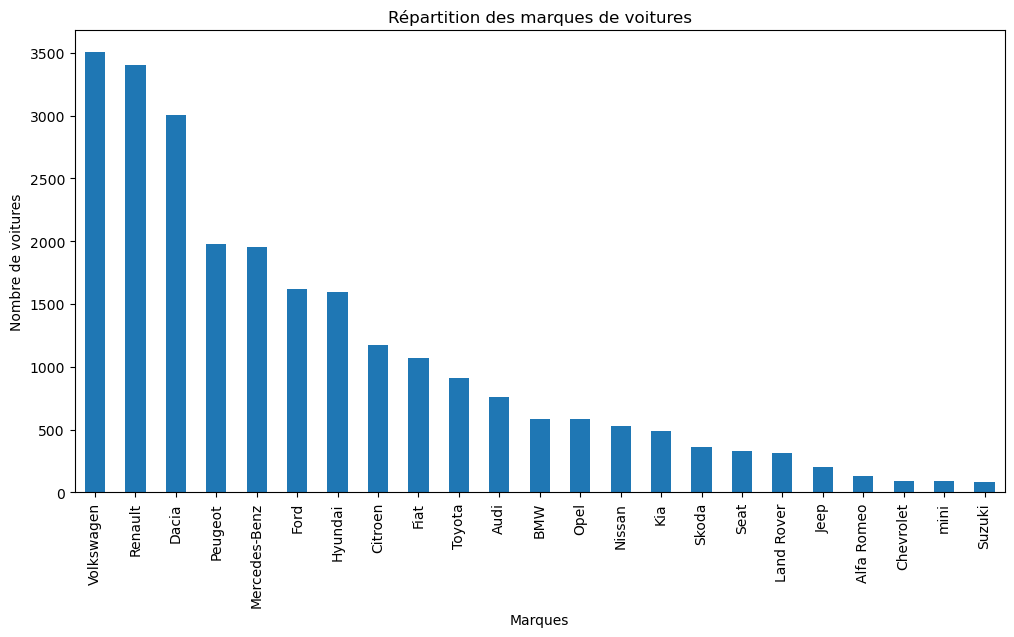

Valeurs uniques dans la colonne 'Type de carburant' : ['Diesel' 'Essence' 'Hybride' 'Electrique']
Décompte des types de carburant :
 Type de carburant
Diesel        22618
Essence        2122
Hybride          18
Electrique       18
Name: count, dtype: int64


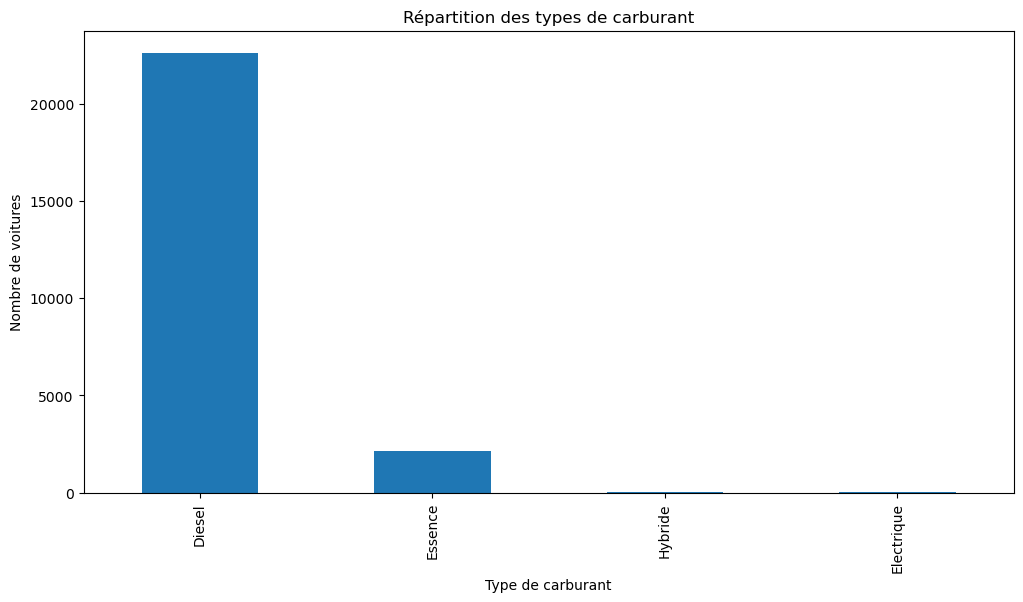

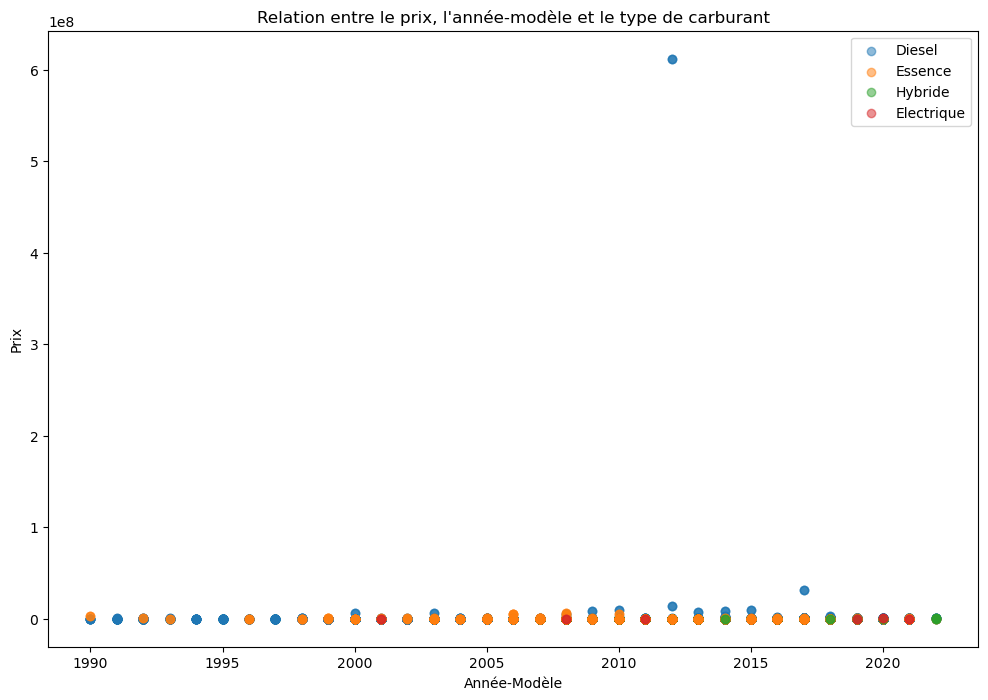

Moyenne des prix par marque :
 Marque
Fiat              97210.747664
mini              97988.636364
Toyota           105429.074890
Opel             109192.979452
Kia              109902.240326
Dacia            119507.909605
Ford             120099.132344
Hyundai          121531.261770
Skoda            127158.904110
Alfa Romeo       130638.461538
Seat             134254.354354
Peugeot          142074.816388
Nissan           145424.436090
Mercedes-Benz    160799.861751
Citroen          168099.891823
Volkswagen       171830.544105
BMW              187853.061224
Jeep             191790.594059
Audi             219466.186107
Land Rover       284173.076923
Chevrolet        284445.054945
Suzuki           559793.103448
Renault          658340.932179
Name: Prix, dtype: float64


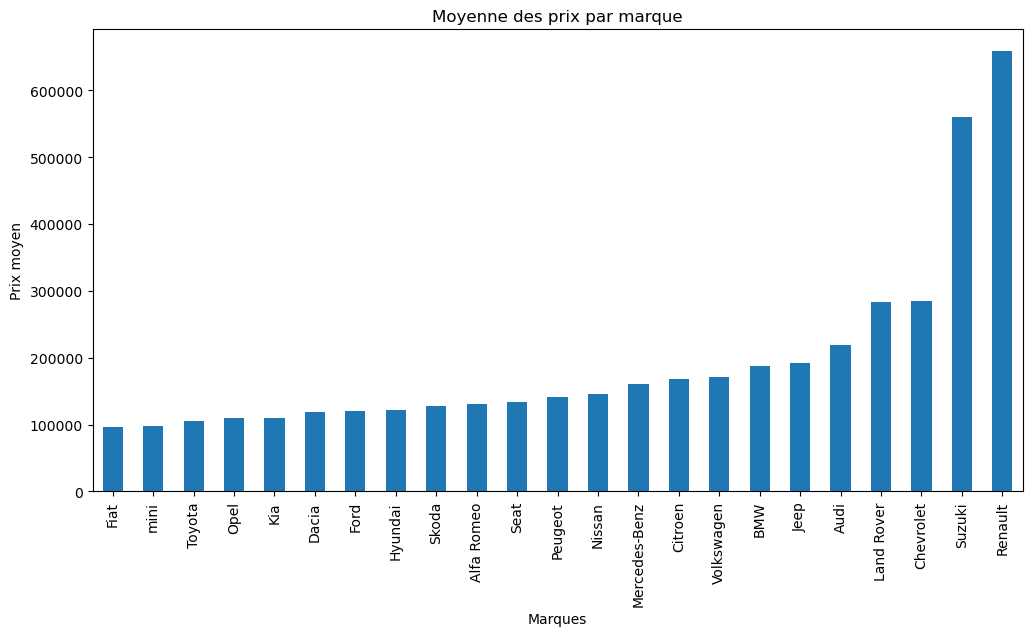

Marques avec les prix moyens les plus élevés :
 Marque
Audi          219466.186107
Land Rover    284173.076923
Chevrolet     284445.054945
Suzuki        559793.103448
Renault       658340.932179
Name: Prix, dtype: float64
Marques avec les prix moyens les plus bas :
 Marque
Fiat       97210.747664
mini       97988.636364
Toyota    105429.074890
Opel      109192.979452
Kia       109902.240326
Name: Prix, dtype: float64
Moyenne des prix par type de carburant :
 Type de carburant
Essence       134512.158341
Electrique    179666.666667
Diesel        224702.176276
Hybride       243833.333333
Name: Prix, dtype: float64


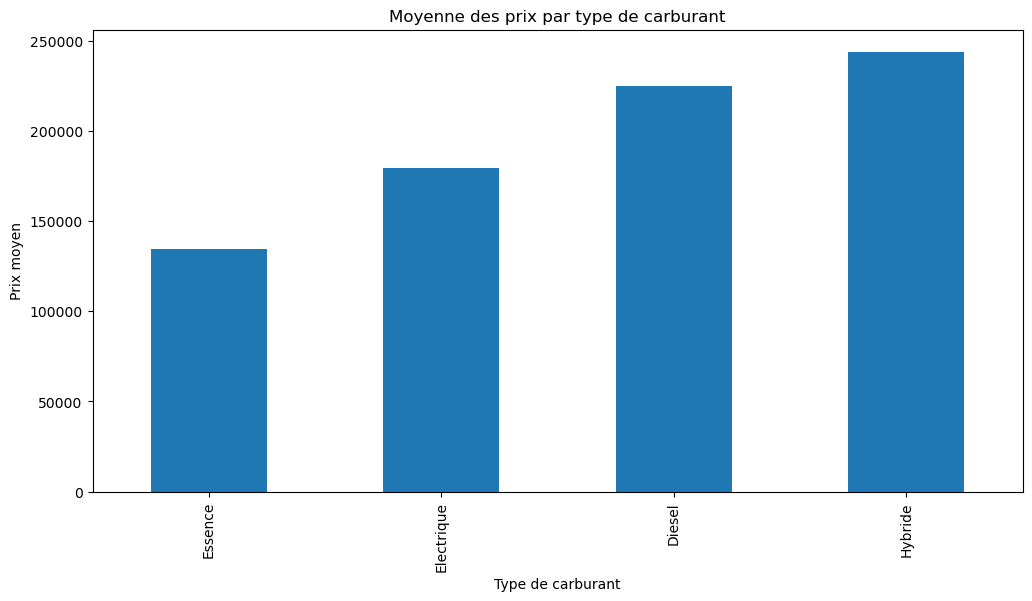

In [28]:
#Partie 1
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Q2
file_path = r"C:\Users\HP\Downloads\VoitureMaroc_dataset.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
print("Données chargées avec succès.")
#Q3
seuil = 5
comptes_marque = df['Marque'].value_counts()
marques_rares = comptes_marque[comptes_marque < seuil].index
df = df[~df['Marque'].isin(marques_rares)]
print("Marques rares supprimées.")
#Q4
print(df.head())
#Q5

print(f"Dimensions du DataFrame : {df.shape}")
#Q6
print(df.describe(include='all'))
#Q7
print(df.isna().sum())
#Q8
colonnes = ["Boite de vitesses", "Origine", "État", "Première main"]
for colonne in colonnes:
    print(f"Valeur la plus fréquente dans '{colonne}': {df[colonne].mode()[0]}")
#Q9-a
df['Boite de vitesses'].replace('--', 'Manuelle', inplace=True)
df['Origine'].fillna('WW au Maroc', inplace=True)
df['Nombre de portes'].fillna('5', inplace=True)
df['État'].fillna('Bon', inplace=True)
df['Première main'].fillna('Non', inplace=True)
print("Valeurs spécifiques remplacées dans les colonnes.")
#Q9-b
colonnes_booleennes = df.select_dtypes(include=['bool']).columns
df[colonnes_booleennes] = df[colonnes_booleennes].astype(int)
print("Valeurs booléennes converties en 1 et 0.")
#Q9-c
colonnes_a_supprimer = ['Unnamed: 0', 'Lien', 'Secteur', 'Ville']
df.drop(columns=colonnes_a_supprimer, inplace=True)
print("Colonnes non pertinentes supprimées.")
#Q9-d
df.dropna(inplace=True)
print("Lignes contenant des valeurs manquantes supprimées.")
#Q9-e
print("Nombre de valeurs NaN restantes par colonne :")
print(df.isna().sum())
#etape 2 Q 1

resume_statistique = df.describe().round(2)
print(resume_statistique)
#Q2 
df['Année-Modèle'] = df['Année-Modèle'].astype(int) 
df['Nombre de portes'] = df['Nombre de portes'].astype(int) 
print("DataFrame après conversion des colonnes 'Année-Modèle' et 'Nombre de portes' en entiers :\n", df)

# q3 Diviser la colonne 'Kilométrage' en deux parties et calculer la moyenne
splited = df['Kilométrage'].str.split("-", n=1, expand=True)
splited[0] = splited[0].str.replace(' ', '').astype(int)
splited[1] = splited[1].str.replace(' ', '').astype(int)
df['Kilométrage'] = (splited[1] + splited[0]) / 2
print("Colonne 'Kilométrage' après conversion en valeurs moyennes :\n", df['Kilométrage'].head())
#q4
df['Puissance fiscale'] = df['Puissance fiscale'].astype(int)
print("Colonne 'Puissance fiscale' convertie en entier :\n", df['Puissance fiscale'].head())
# 5. Afficher à nouveau un résumé statistique des colonnes numériques
resume_statistique_mis_a_jour = df.describe().round(2)
print("Résumé statistique mis à jour des colonnes numériques :\n", resume_statistique_mis_a_jour)
#partie 3 Q1
valeurs_uniques_marque = df['Marque'].unique()
print("Valeurs uniques dans la colonne 'Marque' :", valeurs_uniques_marque)
#Q2
comptes_marque = df['Marque'].value_counts()
print("Décompte des marques :\n", comptes_marque)
#Q3
plt.figure(figsize=(12, 6))
comptes_marque.plot(kind='bar')
plt.title('Répartition des marques de voitures')
plt.xlabel('Marques')
plt.ylabel('Nombre de voitures')
plt.show()
#Q4
valeurs_uniques_carburant = df['Type de carburant'].unique()
print("Valeurs uniques dans la colonne 'Type de carburant' :", valeurs_uniques_carburant)
comptes_carburant = df['Type de carburant'].value_counts()
print("Décompte des types de carburant :\n", comptes_carburant)
plt.figure(figsize=(12, 6))
comptes_carburant.plot(kind='bar')
plt.title('Répartition des types de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Nombre de voitures')
plt.show()
#Q5
plt.figure(figsize=(12, 8))
for carburant in df['Type de carburant'].unique():
    subset = df[df['Type de carburant'] == carburant]
    plt.scatter(subset['Année-Modèle'], subset['Prix'], label=carburant, alpha=0.5)

plt.title('Relation entre le prix, l\'année-modèle et le type de carburant')
plt.xlabel('Année-Modèle')
plt.ylabel('Prix')
plt.legend()
plt.show()
#Q6
moyenne_prix_marque = df.groupby('Marque')['Prix'].mean().sort_values()
print("Moyenne des prix par marque :\n", moyenne_prix_marque)
#Q7
plt.figure(figsize=(12, 6))
moyenne_prix_marque.plot(kind='bar')
plt.title('Moyenne des prix par marque')
plt.xlabel('Marques')
plt.ylabel('Prix moyen')
plt.show()
#Q8
marques_prix_elevés = moyenne_prix_marque.tail(5)
marques_prix_bas = moyenne_prix_marque.head(5)
print("Marques avec les prix moyens les plus élevés :\n", marques_prix_elevés)
print("Marques avec les prix moyens les plus bas :\n", marques_prix_bas)
#Q9
moyenne_prix_carburant = df.groupby('Type de carburant')['Prix'].mean().sort_values()
print("Moyenne des prix par type de carburant :\n", moyenne_prix_carburant)

plt.figure(figsize=(12, 6))
moyenne_prix_carburant.plot(kind='bar')
plt.title('Moyenne des prix par type de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Prix moyen')
plt.show()
